# Лабораторная работа 3.
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


### Выполнил студент группы БСТ2201 Жабров Анатолий

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом.

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса.

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:
- Алгоритм Флойда-Уоршелла
- Алгоритм Дейкстры
- Алгоритм Беллмана-Форда
- Алгоритм Джонсона
- Алгоритм Левита
- Алгоритм Йена


### Выполнение:

In [2]:
import pandas as pd
from pyvis.network import Network
import networkx as nx
import math
import copy
import random
import time
import matplotlib.pyplot as plt

In [3]:
#Алгоритм генерации случайного графа в виде матрицы смежности
def generate_matrix():
    size = random.randint(30, 100)
    matrix = [[math.inf for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            if random.randint(0, 5) == 5 and i != j:
                rand_count = random.randint(1, 20)
                matrix[i][j] = rand_count
    return matrix

In [4]:
options = """var options = {
  "edges": {
    "arrows": {
      "to": {
        "enabled": true
      }
    },
    "color": {
      "inherit": true
    },
    "smooth": false
  },
  "interaction": {
    "navigationButtons": true
  },
  "physics": {
    "minVelocity": 0.75
  }
}
"""

def draw_graph(graph, path = None):
    colors = None
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)

In [5]:
#создание графа, используя матрицу смежности
def create_graph(matrix : list) -> nx.DiGraph:
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and i != j:
                graph.add_edge(i + 1, j + 1, weight=matrix[i][j], label=matrix[i][j])
    for edge in graph.edges():
        graph.edges[edge]['color'] = 'blue'
    return graph

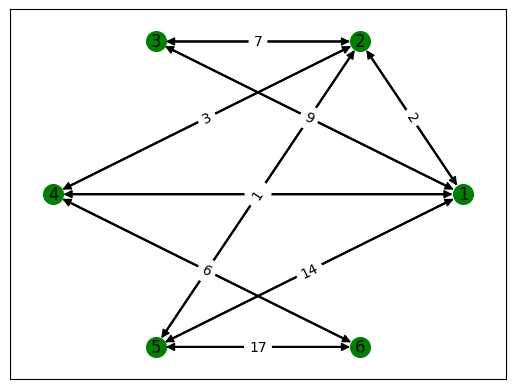

In [6]:
#загрузка матрицы из файла
with open("matrix.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
#создаём граф
graph = create_graph(matrix)

draw_graph(graph)
#отображаем граф из файла
# nt = Network(notebook = True)
# nt.from_nx(graph)
# nt.set_options(options)


## Алгоритм Флойда-Уоршелла

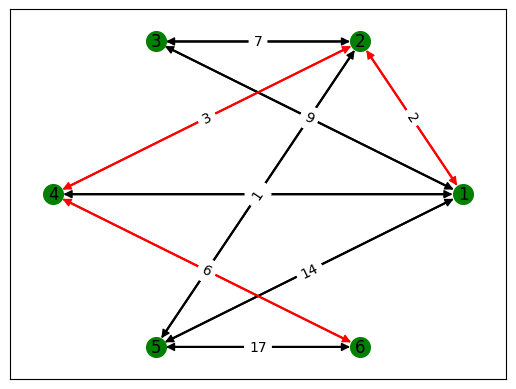

In [7]:
#получение пути
def get_path(H, v, u):
    v -= 1
    u -= 1
    result = []
    result.append(v)
    while v != u:
        v = H[v][u]
        result.append(v)
    __result = [el + 1 for el in result]
    return __result


#алгоритм
def floyd(matrix):
    W = copy.deepcopy(matrix)
    N = len(W)
    H = [[0 for i in range(N)] for j in range(N)]
    for i in range(len(W)):
        for j in range(len(W)):
            if W[i][j] != math.inf:
                H[i][j] = j

    for i in range(len(W)):
        for j in range(len(W)):
            if i == j: continue
            if W[i][j] != math.inf:
                # потенциальные промежуточные вершины
                for k in range(len(W)):
                    if i == k or j == k: continue
                    if W[i][k] > W[i][j] + W[j][k]:
                        W[i][k] = W[i][j] + W[j][k] # обновляем вес
                        H[i][k] = H[i][j] # обновляем номер промежуточной вершины
    return (W, H)


result = floyd(matrix)
path = get_path(result[1], 1, 6)


#вносим графические изменения
graph1 = copy.deepcopy(graph)
for i in range(1, len(path)):
    graph1.nodes[path[i - 1]]['color'] = 'red'
    graph1.edges[path[i - 1], path[i]]['color'] = 'red'
graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph, path)

#отображаем граф с решением
# nt1 = Network(notebook=True)
# nt1.set_options(options)
# nt1.from_nx(graph1)
# nt1.show("test1.html")

In [8]:
#тестовый блок для определения скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(len(temp_matrix)):
            if temp_matrix[i][j] != math.inf:
                edge_counts += 1
    t1 = time.time()
    result = floyd(temp_matrix)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,92,1418,90
1,37,216,5
2,30,147,4
3,74,890,47
4,82,1130,54
5,47,328,9
6,33,192,3
7,72,850,34
8,33,187,3
9,46,307,9


## Алгоритм Дейкстры

Длина 11


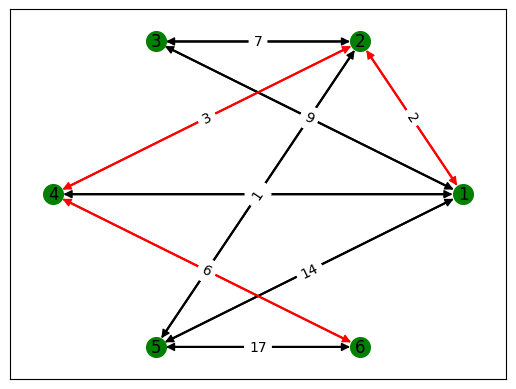

In [9]:
#алгоритм
def dijkstra(__matrix, v, u):
    matrix = copy.deepcopy(__matrix)
    v -= 1
    u -= 1
    N = len(matrix)
    D = [matrix[v][i] for i in range(N)]
    D[v] = 0
    P = [[v] for i in range(N)]
    checked_nodes = {v}
    for i in range(N):
        temp_min = math.inf
        node = None
        for j in range(N):
            if D[j] < temp_min and j not in checked_nodes:
                temp_min = D[j]
                node = j
        if node is not None:
            checked_nodes.add(node)
            for k in range(N):
                if D[k] > matrix[node][k] + D[node]:
                    D[k] = matrix[node][k] + D[node]
                    P[k] = copy.deepcopy(P[node])
                    P[k].append(node)
        else:
            break

    for i in range(N):
        if D[i] != math.inf and P[i][0] != i:
            P[i].append(i)

    if D[u] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[u]]
    return (D, path, P)



result = dijkstra(matrix, 1, 6)
path = result[1]



#вносим графические изменения

graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)
print(f"Длина {result[0][5]}")

#отображаем граф с решением
# nt1 = Network(notebook=True)
# nt1.set_options(options)
# nt1.from_nx(graph1)
# nt1.show("test1.html")

In [10]:
#тестовый блок для определения скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(len(temp_matrix)):
            if temp_matrix[i][j] != math.inf:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = dijkstra(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,35,210,1
1,91,1322,4
2,83,1184,3
3,86,1245,4
4,97,1553,4
5,49,416,1
6,97,1588,3
7,57,530,1
8,48,348,1
9,86,1188,3


## Алгоритм Беллмана-Форда

Длина 11


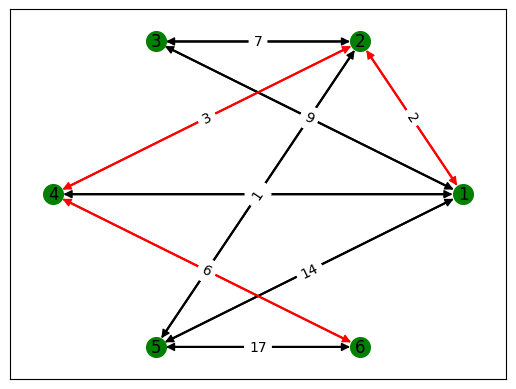

In [11]:
#алгоритм Беллмана-Форда
def bell_ford(matrix, v, u):
    v -= 1
    u -= 1
    N = len(matrix)
    cycle = False
    A = [[math.inf for i in range(N)] for j in range(N)] #кратчайшие расстояния от начальной вершины до всех остальных
    P = [[v] for i in range(N)] # предшественники вершин в кратчайшем пути
    A[0][v] = 0
    for k in range(1, N): # перебор длины пути
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(N):
            for j in range(N):
                if matrix[i][j] == math.inf:
                    continue
                calculated_distance = A[k - 1][i] + matrix[i][j] 
                if A[k][j] > calculated_distance:
                    A[k][j] = calculated_distance # обновление расстояния
                    P[j] = copy.deepcopy(P[i]) 
                    P[j].append(j) # и добавление предшественника
    if A[-1] != A[-2]: # сравнение последней и предпоследней итерации
        cycle = True # цикл с отрицательным суммарным весом

    if A[-1][u] == math.inf or len(P[u]) == 1:
        path = [] # путь не найден
    else:
        path = [el + 1 for el in P[u]] # путь найден, восстанавливается список вершин кратчайшего пути
    return (A[-1], path, P, cycle)

result = bell_ford(matrix, 1, 6)
path = result[1]

#вносим графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)
print(f"Длина {result[0][5]}")

#отображаем граф с решением
# nt1 = Network(notebook=True)
# nt1.set_options(options)
# nt1.from_nx(graph1)
# nt1.show("test1.html")

In [12]:
#тестовый блок для определения скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = bell_ford(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,64,2016,26
1,35,595,6
2,64,2016,24
3,64,2016,20
4,93,4278,59
5,71,2485,26
6,73,2628,28
7,39,741,4
8,90,4005,50
9,97,4656,65


## Алгоритм Джонсона

Длина 11


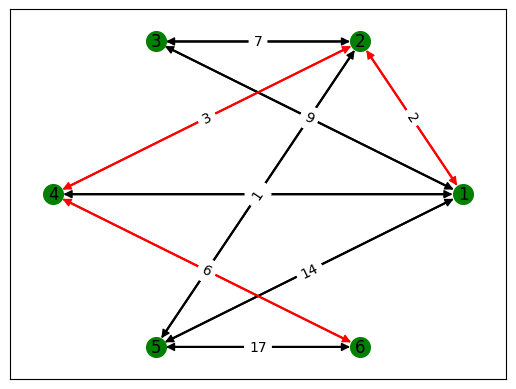

In [13]:
#алгоритм Джонсона
def johnson(__matrix, v, u):
    v -= 1
    u -= 1
    w = copy.deepcopy(__matrix)
    matrix = copy.deepcopy(__matrix)
    N = len(matrix)
    for i in range(N):
        w[i].append(math.inf)
    w.append([0 for i in range(N + 1)]) # матрица смежности с новой вершиной
    # Алгоритм Бэлмана-Форда для нахождения весов новой вершины
    temp_result = bell_ford(w, 1, N + 1)
    if temp_result[3] == True:
        return ([], [], []) # Входной граф содержит цикл с отрицательным весом
    for i in range(N):
        for j in range(N):
            if matrix[i][j] != math.inf and temp_result[0][i] != math.inf and temp_result[0][j] != math.inf:
                matrix[i][j] += temp_result[0][i] - temp_result[0][j] # пересчет веса ребра по Бэлмана-Форда
    # после перевзвешивания все веса ребер неотрицательны => Поиск кратчайших путей алгоритмом Дейкстры
    distArr = []
    pathArr = []
    for i in range(N):
        dijkstra_result = dijkstra(matrix, i + 1, i + 1)
        distArr.append(dijkstra_result[0])
        pathArr.append(dijkstra_result[2])
    # Корректировка расстояний
    for i in range(N):
        for j in range(N):
            if distArr[i][j] != math.inf and temp_result[0][i] != math.inf and temp_result[0][j] != math.inf:
                distArr[i][j] += temp_result[0][j] - temp_result[0][i] # пересчет веса ребра по Бэлмана-Форда

    return (distArr, [el + 1 for el in pathArr[v][u]], pathArr)


result = johnson(matrix, 1, 6)
path = result[1]

#вносим графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)
print(f"Длина {result[0][0][5]}")

#отображаем граф с решением
# nt1 = Network(notebook=True)
# nt1.set_options(options)
# nt1.from_nx(graph1)
# nt1.show("test1.html")
# draw_graph(graph1, path)

In [21]:
#тестовый блок для определения скорости работы алгоритма

tests = []

for i in range(12):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = johnson(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,59,1711,98
1,39,741,30
2,37,666,25
3,87,3741,279
4,79,3081,213
5,66,2145,130
6,67,2211,138
7,84,3486,461
8,98,4753,403
9,63,1953,111


## Алгоритм Левита

Кратчайший путь от вершины 1 до вершины 6:
[1, 2, 4, 6]
Длина кратчайшего пути: 11


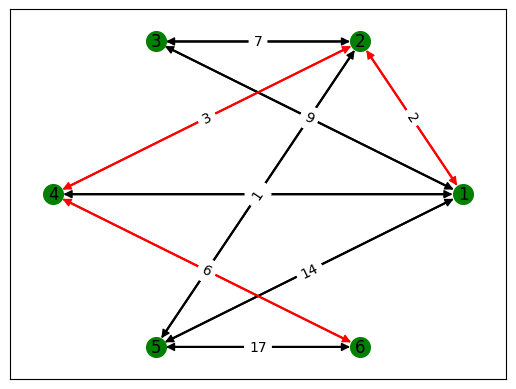

In [15]:
import networkx as nx

def levit_algorithm(graph, start, end):
    # Инициализация
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    predecessors = {}

    # Основной цикл
    queue = [start] # вершины для обработки
    while queue:
        node = queue.pop(0)
        if node == end:
            break
        for neighbor in graph.neighbors(node):
            weight = graph[node][neighbor]['weight']
            if distances[neighbor] > distances[node] + weight:
                distances[neighbor] = distances[node] + weight
                predecessors[neighbor] = node
                if neighbor not in queue:
                    queue.append(neighbor)

    # Восстановление пути
    path = []
    node = end
    while node != start:
        path.insert(0, node)
        node = predecessors[node]
    path.insert(0, start)

    return path

def get_path_length(graph, path):
  if len(path) <= 1:
    return 0

  total_weight = 0
  for i in range(len(path) - 1):
    u, v = path[i], path[i + 1]
    total_weight += graph.edges[u, v]['weight']

  return total_weight

graph = create_graph(matrix)
shortest_path = levit_algorithm(graph, 1, 6)
print(f"Кратчайший путь от вершины 1 до вершины 6:")
print(shortest_path)

draw_graph(graph, shortest_path)
print(f"Длина кратчайшего пути: {get_path_length(graph, shortest_path)}")
plt.show()


## Алгоритм Йена

Длина 11


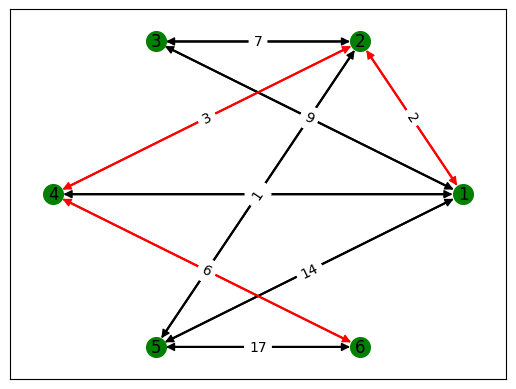

Длина 12


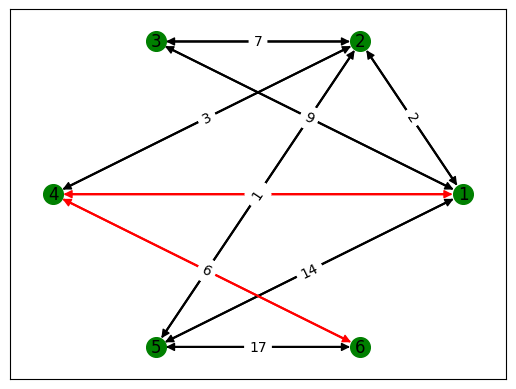

Длина 20


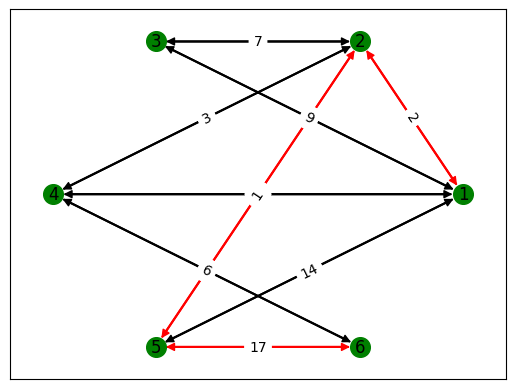

Длина 24


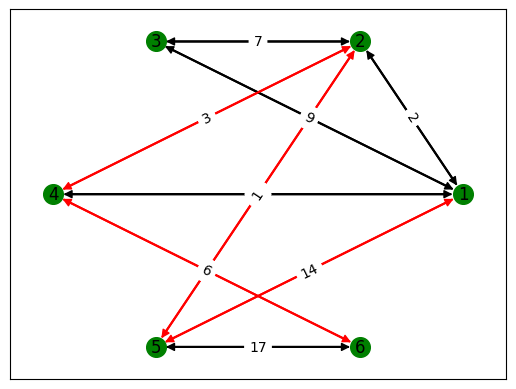

Длина 25


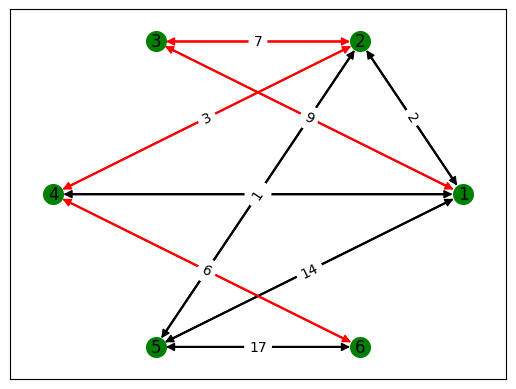

In [16]:
def yen(__matrix, v, u, K):
    v -= 1
    u -= 1
    matrix = copy.deepcopy(__matrix)
    N = len(matrix)
    temp = dijkstra(matrix, v + 1, u + 1)
    candidates = set()
    paths = [[el - 1 for el in temp[1]]]
    lengths = [temp[0][u]]
    if len(paths[0]) < 2:
        return ([], [])
    for k in range (1, K): # поиск K путей
        cur_mat = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1): # Перебираются все вершины, кроме последней, в ранее найденном кратчайшем пути 
            spur_node = paths[-1][i]
            root_path = paths[-1][:i + 1]

            for path in paths:
                if root_path == path[:i + 1]: # найденного пути совпадает с началом пути до текущей вершины
                    cur_mat[path[i]][path[i + 1]] = math.inf # исключаем использование этого ребра в следующих поисках

            for node in root_path:
                if node != spur_node: # кроме текущей
                    cur_mat[node] = [math.inf for j in range(N)]

            temp = dijkstra(cur_mat, spur_node + 1, u + 1)
            spur_path = [el - 1 for el in temp[1][1:]]
            if len(spur_path) < 1:
                continue

            # Создается полный путь (путь до текущей вершины + альтернативный путь).
            total_path = root_path
            total_path.extend(spur_path)
            total_path = tuple(total_path)
            distance = 0
            # расчет длины полного пути
            for j in range(1, len(total_path)):
                distance += matrix[total_path[j - 1]][total_path[j]]

            candidates.add((total_path, distance))
        if len(candidates) == 0: # не найдено больше K-кратчайших путей
            break

        # Выбор K-кратчайших путей
        sorted_candidates = list(candidates)
        sorted_candidates.sort(key = lambda x : x[1])
        paths.append(list(sorted_candidates[0][0]))
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0])
    for i in range(len(paths)):
        paths[i] = [el + 1 for el in paths[i]]
    return (paths, lengths)

result = yen(matrix, 1, 6, 5)
paths = result[0]
#вносим графические изменения
for i in range(len(paths)):
    graph1 = copy.deepcopy(graph)
    path = paths[i]
    for j in range(1, len(path)):
        graph1.nodes[path[j - 1]]['color'] = 'red'
        graph1.edges[path[j - 1], path[j]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'
    # nt1 = Network(notebook=True)
    # nt1.prep_notebook()
    # nt1.set_options(options)
    # nt1.from_nx(graph1)
    # nt1.show("test" + str(i + 3) + ".html")

    draw_graph(graph1, paths[i])
    print(f"Длина {result[1][i]}")
    plt.show()

In [17]:
#тестовый блок для определения скорости работы алгоритма

tests = []

for i in range(20):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    c3 = random.randint(3, 10)
    result = yen(temp_matrix, c1, c2, c3)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, c3, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Кол-во маршрутов", "Время в мс"])

,Количество узлов,Количество ребер,Кол-во маршрутов,Время в мс
0,74,2701,8,166
1,41,820,6,25
2,84,3486,10,138
3,43,903,6,17
4,30,435,6,10
5,41,820,9,27
6,81,3240,9,123
7,32,496,4,6
8,61,1830,9,100
9,45,990,5,14


# Оценка сложности
| Алгоритм | Временная сложность в худшем случае |
| ----------- | ----------- |
| Беллман-Форд | O(V * E) |
| Дейкстра | O(V^2) |
| Флойд-Уоршелл | O(V^3) |
| Джонсон | O(V^2 * log V + V * E) |
| Левит | O(V * E + V^2 * log V) |
| Йен | O(k * (V + E)) (для k-го кратчайшего пути) |

## Вывод
### Мы реализовали алгоритмы поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с заданием, проанализировали временную сложность работы заданных алгоритмов.
